In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tarfile
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**(2) Language Identification with a Naive Bayes Classifier**

In [ ]:
# files = tarfile.open('/content/drive/MyDrive/Colab Notebooks/CS760HW4/languageID.tgz', 'r:gz')
# files

# files.extractall('/content/drive/MyDrive/Colab Notebooks/CS760HW4/train_files')
# files.close

<bound method TarFile.close of <tarfile.TarFile object at 0x7ff91515a040>>

Text Files -> Arrays of Characters with Labels

In [4]:
train_folder = '/content/drive/MyDrive/Colab Notebooks/CS760HW4/train_files/languageID'

languages = ['e', 'j', 's']  
file_names = []
for lang in languages:
    for i in range(0, 20):
        file_names.append(f"{lang}{i}.txt")

X_train = []
y_train = []

for lang in languages:
  for f in file_names:
    if f.startswith(lang):  
      with open(os.path.join(train_folder, f), 'r', encoding='utf-8') as file:
        text = file.read()
        X_train.append(text)
        y_train.append(lang)
#X_train
#y_train

Text -> Bag(s) of characters

In [5]:
#S = 27
from sklearn.feature_extraction.text import CountVectorizer

alphabet = 'abcdefghijklmnopqrstuvwxyz'
custom_vocab = {char: i for i, char in enumerate(alphabet + ' ')}

vectorizer = CountVectorizer(analyzer='char', lowercase=True, max_features=27, vocabulary=custom_vocab)
train_features = vectorizer.fit_transform(X_train)

In [6]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.5)
clf.fit(train_features, y_train)

MultinomialNB(alpha=0.5)

In [7]:
X_test = ['These chips with salsa are delicious']
test_features = vectorizer.transform(X_test)
predictions = clf.predict(test_features)
predictions

array(['e'], dtype='<U1')

In [8]:
#(1) Prior Probabilities
#Pα(Y = c_k) = (∑ 1[y(i) = c_k]) + α / (N + Kα)
α = 0.5
(20 + α)/(60 + 3*(α))

0.3333333333333333

In [9]:
#(2) Class Conditional Probabilities 
theta_e = np.zeros((27,))
theta_j = np.zeros((27,))
theta_s = np.zeros((27,))

for i in range(27):
  count_e = np.sum(train_features[0:20,i])
  theta_e[i] = (count_e + α)/(np.sum(train_features[0:20,i]) + 27*α)
  count_j = np.sum(train_features[20:40,i])
  theta_j[i] = (count_j + α)/(np.sum(train_features[20:40,i]) + 27*α)
  count_s = np.sum(train_features[40:60,i])
  theta_s[i] = (count_s + α)/(np.sum(train_features[40:60,i]) + 27*α)

print('e:', np.round(theta_e, 3))
print('j:', np.round(theta_j, 3))
print('s:', np.round(theta_s, 3))

e: [0.994 0.97  0.983 0.984 0.997 0.982 0.978 0.992 0.993 0.701 0.916 0.988
 0.984 0.994 0.994 0.978 0.653 0.993 0.994 0.996 0.986 0.962 0.977 0.766
 0.973 0.587 0.998]
j: [0.997 0.957 0.92  0.973 0.993 0.885 0.971 0.986 0.995 0.823 0.992 0.726
 0.989 0.992 0.995 0.612 0.103 0.99  0.99  0.992 0.994 0.297 0.978 0.037
 0.968 0.945 0.997]
s: [0.996 0.959 0.989 0.99  0.996 0.947 0.945 0.92  0.992 0.942 0.366 0.992
 0.983 0.992 0.994 0.983 0.949 0.993 0.994 0.988 0.988 0.935 0.395 0.861
 0.947 0.888 0.998]


In [10]:
#(4) e10.txt as test set
with open(os.path.join(train_folder, 'e10.txt'), 'r', encoding='utf-8') as file:
  x = file.read()
x_boc = vectorizer.fit_transform([x])
x_boc.todense()

matrix([[164,  32,  53,  57, 311,  55,  51, 140, 140,   3,   6,  85,  64,
         139, 182,  53,   3, 141, 186, 225,  65,  31,  47,   4,  38,   2,
         492]])

In [11]:
#(5) ˆp(x | y) for y = e, j, s for e10.txt
#exp(np.sum(x*log(theta) for each char in each language))
for theta in [theta_e, theta_j, theta_s]:
  print(np.sum(x_boc*np.log(theta)))
  print(np.log(theta))

-27.52183139940881
[-0.00593338 -0.03023486 -0.01668845 -0.01643526 -0.00345561 -0.01818232
 -0.02264905 -0.00784554 -0.00668039 -0.35503425 -0.08789438 -0.01209317
 -0.01641451 -0.00636633 -0.00562042 -0.02210974 -0.42566782 -0.00723029
 -0.00573447 -0.00439338 -0.01419238 -0.03916163 -0.02342449 -0.26687894
 -0.02702867 -0.53221681 -0.00202808]
-144.89675562292027
[-0.00340314 -0.04437588 -0.08284991 -0.02714154 -0.0074799  -0.12164511
 -0.02981872 -0.01420789 -0.0045407  -0.19464204 -0.00784554 -0.31977039
 -0.01097057 -0.00787883 -0.00497133 -0.49112055 -2.26868354 -0.0105179
 -0.0105179  -0.00773813 -0.00638823 -1.21302264 -0.02196034 -3.29583687
 -0.03202244 -0.05653679 -0.00350499]
-89.5295802837406
[-0.00388989 -0.04235161 -0.01123607 -0.01020417 -0.00368899 -0.05486608
 -0.05604915 -0.08338161 -0.00826977 -0.05992576 -1.00552187 -0.00778447
 -0.01666705 -0.00761128 -0.0058506  -0.01703842 -0.0522207  -0.00706909
 -0.00623802 -0.01168028 -0.01179687 -0.06773422 -0.92798677 -0.1

In [12]:
#(6) posterior p(y|x) = p(x|y)*p(y)
for theta in [theta_e, theta_j, theta_s]:
  print(np.sum(x_boc*np.log(theta)) - np.log(3))
  print(np.log(theta))

-28.62044368807692
[-0.00593338 -0.03023486 -0.01668845 -0.01643526 -0.00345561 -0.01818232
 -0.02264905 -0.00784554 -0.00668039 -0.35503425 -0.08789438 -0.01209317
 -0.01641451 -0.00636633 -0.00562042 -0.02210974 -0.42566782 -0.00723029
 -0.00573447 -0.00439338 -0.01419238 -0.03916163 -0.02342449 -0.26687894
 -0.02702867 -0.53221681 -0.00202808]
-145.99536791158837
[-0.00340314 -0.04437588 -0.08284991 -0.02714154 -0.0074799  -0.12164511
 -0.02981872 -0.01420789 -0.0045407  -0.19464204 -0.00784554 -0.31977039
 -0.01097057 -0.00787883 -0.00497133 -0.49112055 -2.26868354 -0.0105179
 -0.0105179  -0.00773813 -0.00638823 -1.21302264 -0.02196034 -3.29583687
 -0.03202244 -0.05653679 -0.00350499]
-90.62819257240871
[-0.00388989 -0.04235161 -0.01123607 -0.01020417 -0.00368899 -0.05486608
 -0.05604915 -0.08338161 -0.00826977 -0.05992576 -1.00552187 -0.00778447
 -0.01666705 -0.00761128 -0.0058506  -0.01703842 -0.0522207  -0.00706909
 -0.00623802 -0.01168028 -0.01179687 -0.06773422 -0.92798677 -0.

In [13]:
#how does the classifier work?
#create pipeline for classification
def classify_nb(x_test):
  with open(os.path.join(train_folder, x_test), 'r', encoding='utf-8') as file:
    x = file.read()
    x_boc = vectorizer.fit_transform([x])
    
  y_tester = -np.inf
  i=[]
  for theta in [theta_e, theta_j, theta_s]:
    #print(np.sum(x_boc*np.log(theta)))
    if(np.sum(x_boc*np.log(theta)) - np.log(3))>y_tester:
      y_tester = np.sum(x_boc*np.log(theta)) - np.log(3)
      i = theta
  # print(i)  
  if(np.array_equiv(i,theta_e)):
    print('English')
  elif(np.array_equiv(i,theta_j)):
    print('Japanese')
  else:
    print('Spanish')

  print(y_tester)

In [14]:
#(7) Performance of Classifier
X_testset = []
for lang in languages:
    for i in range(10, 20):
        X_testset.append(f"{lang}{i}.txt")
#X_testset
for x in X_testset:
  print(x)
  classify_nb(x)

e10.txt
English
-28.62044368807692
e11.txt
English
-32.3461800890574
e12.txt
English
-17.671819016323965
e13.txt
English
-16.898037692522045
e14.txt
English
-16.64197548061217
e15.txt
English
-16.517385839228552
e16.txt
English
-25.980238502191863
e17.txt
English
-25.207696370465666
e18.txt
English
-16.085864174744465
e19.txt
English
-6.661001809448502
j10.txt
Japanese
-17.37161652303458
j11.txt
Japanese
-15.152184102526695
j12.txt
Japanese
-13.836801478066453
j13.txt
Japanese
-18.8359261469053
j14.txt
Japanese
-16.72414013635794
j15.txt
Japanese
-16.241642532355286
j16.txt
Japanese
-16.723159220062293
j17.txt
Japanese
-17.299266314594764
j18.txt
Japanese
-14.477352911373629
j19.txt
Japanese
-15.145000960235278
s10.txt
Spanish
-19.040037727303087
s11.txt
Spanish
-7.102564612238936
s12.txt
Spanish
-21.27520624296218
s13.txt
Spanish
-11.131514371979133
s14.txt
Spanish
-23.00954564934014
s15.txt
Spanish
-16.765677356399017
s16.txt
Spanish
-19.586822350308385
s17.txt
Spanish
-19.8068366835

In [15]:
#(8) test document - say s16
test_doc = 's7.txt'
with open(os.path.join(train_folder, test_doc), 'r', encoding='utf-8') as file:
    x_t = file.read()
x_t

import random
char_list = list(x_t)
random.shuffle(char_list)
x_t_scrambled = ''.join(char_list)
with open(os.path.join(train_folder,'x_t_scrambled.txt'), 'w') as file:
    file.write(x_t_scrambled)

classify_nb('x_t_scrambled.txt')

Spanish
-13.511257907895676


**(3) Simple Feed-Forward Neural Network**

In [22]:
#(2) Neural Network in NumPy
#utitlized CuPy instead of NumPy so that it runs faster
import cupy as cp

def sigmoid(z):
    return 1 / (1 + cp.exp(-z))

def softmax(z):
    exp_z = cp.exp(z)
    return exp_z / cp.sum(exp_z)
  

def forward(x, params):
    W1, W2, W3 = params
    z1 = cp.dot(W1, x)
    a1 = sigmoid(z1)
    z2 = cp.dot(W2, a1)
    a2 = sigmoid(z2)
    z3 = cp.dot(W3, a2)
    y_hat = softmax(z3)
    return a1, a2, y_hat

def backward(x, y, params, a1, a2, y_hat):
    W1, W2, W3 = params
    delta3 = y_hat - y
    grad_W3 = cp.outer(delta3, a2)
    delta2 = cp.dot(W3.T, delta3) * (a2 * (1 - a2))
    grad_W2 = cp.outer(delta2, a1)
    delta1 = cp.dot(W2.T, delta2) * (a1 * (1 - a1))
    grad_W1 = cp.outer(delta1, x)
    return grad_W1, grad_W2, grad_W3

def nn_train(X, y, n_hidden, n_epochs, learning_rate, batch_size):
    X = cp.asarray(X)
    y = cp.asarray(y)
    n_input = X.shape[1] #d
    n_output = y.shape[1] #k
    W1 = cp.random.randn(n_hidden[0], n_input) #d1 x d
    W2 = cp.random.randn(n_hidden[1], n_hidden[0]) #d2 x d1
    W3 = cp.random.randn(n_output, n_hidden[1]) #k x d2
    losses = []
    for i in range(n_epochs):
        total_loss = 0
        for j in range(0, len(X), batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            for k in range(len(X_batch)):
                x = X_batch[k]
                y_true = y_batch[k]
                a1, a2, y_hat = forward(x, [W1, W2, W3])
                loss = -cp.sum(y_true * cp.log(y_hat))
                total_loss += loss
                grad_W1, grad_W2, grad_W3 = backward(x, y_true, [W1, W2, W3], a1, a2, y_hat)
                W1 = W1 - learning_rate * grad_W1
                W2 = W2 - learning_rate * grad_W2
                W3 = W3 - learning_rate * grad_W3
        #print(f"Epoch {i+1}, loss: {total_loss.get()}")
#        print(f"Epoch {i+1}, loss: {total_loss}")
        losses.append(total_loss)
    
    return W1, W2, W3, losses


MNIST dataset

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

from keras.datasets import mnist
(Xnn_train, ynn_train), (Xnn_val, ynn_val) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [18]:
# plt.imshow(Xnn_train[713])
# print(ynn_train[713])

#normalizing the dataset
Xnn_train_f = Xnn_train.reshape((Xnn_train.shape[0], -1)) / 255.0
Xnn_val_f = Xnn_val.reshape((Xnn_val.shape[0], -1)) / 255.0

#one-hot encoding the labels
ynn_train = to_categorical(ynn_train)
ynn_val = to_categorical(ynn_val)

#train and test using flattened Xnn_train_f, visualize using Xnn_train

In [23]:
d1 = 300
d2 = 200
d3 = 100
n_hidden = [d1, d2]

n_epochs = 70
learning_rate = 0.01
batch_size = 32

# train model
W1, W2, W3, losses = nn_train(Xnn_train_f, ynn_train, n_hidden=n_hidden, n_epochs=n_epochs, learning_rate=learning_rate, batch_size=batch_size)


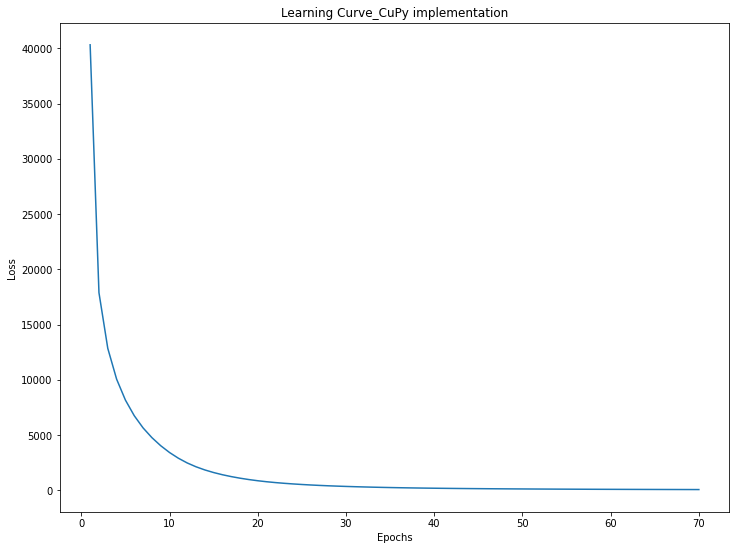

In [36]:
plt.figure(figsize=(12,9))
plt.plot(range(1,71),cp.asnumpy(losses))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve_CuPy implementation')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CS760HW4/LC_CuPy.pdf')

In [79]:
#Test Error

def nn_test(X_val, y_val, params):
    W1, W2, W3 = params
    X_val = cp.asarray(X_val)
    y_val = cp.asarray(y_val)
    n_samples = X_val.shape[0]
    total_loss = 0
    correct_count = 0
    for i in range(n_samples):
        x = X_val[i]
        y_true = y_val[i]
        _, _, y_hat = forward(x, [W1, W2, W3])
        loss = -cp.sum(y_true * cp.log(y_hat))
        total_loss += loss
        if cp.argmax(y_hat) == cp.argmax(y_true):
            correct_count += 1
    avg_loss = total_loss / n_samples
    accuracy = correct_count / n_samples
    return (1-accuracy)

nn_test(Xnn_val_f, ynn_val, [W1,W2,W3])

0.051000000000000045

In [ ]:
#(3) Neural Network implemented in Tensorflow
from tensorflow.keras.layers import Dense

# neural network architecture
model = tf.keras.models.Sequential([
    Dense(n_hidden[0], activation='sigmoid', input_shape=(Xnn_train_f.shape[1],)),
    Dense(n_hidden[1], activation='sigmoid'),
    Dense(ynn_train.shape[1], activation='softmax')
])

# compile model with stochastic gradient descent optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train model with batch size of 32 and 70 epochs
history = model.fit(Xnn_train_f, ynn_train, epochs=70, batch_size=32)

# evaluate model on test set
test_loss, test_acc = model.evaluate(Xnn_val_f, ynn_val)
print(f'Test error: {1 - test_acc}')

Epoch 1/70
1875/1875 [==============================] - 9s 3ms/step - loss: 2.1400 - accuracy: 0.3815
Epoch 2/70
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4606 - accuracy: 0.6783
Epoch 3/70
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8802 - accuracy: 0.7875
Epoch 4/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6447 - accuracy: 0.8339
Epoch 5/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5309 - accuracy: 0.8581
Epoch 6/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4660 - accuracy: 0.8740
Epoch 7/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4247 - accuracy: 0.8845
Epoch 8/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3968 - accuracy: 0.8905
Epoch 9/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8949
Epoch 10/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.361

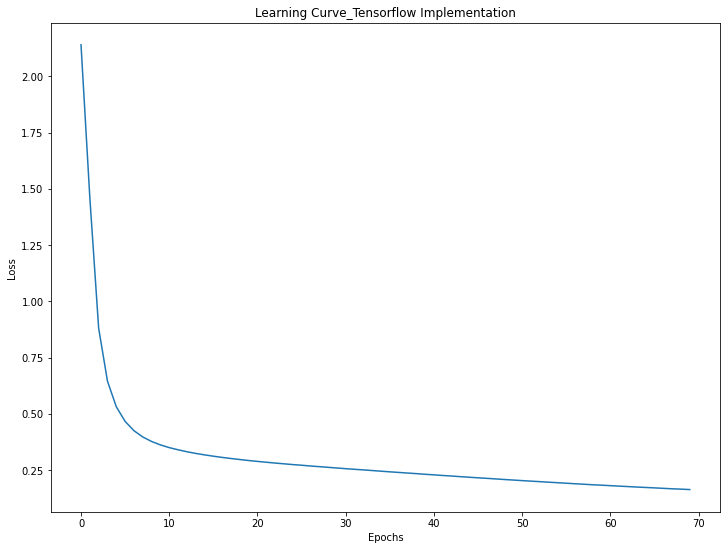

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve_Tensorflow Implementation')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CS760HW4/LC_Tf.pdf')

Epoch 1/70
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3047 - accuracy: 0.1045
Epoch 2/70
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3046 - accuracy: 0.1081
Epoch 3/70
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3046 - accuracy: 0.1052
Epoch 4/70
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3046 - accuracy: 0.1044
Epoch 5/70
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3043 - accuracy: 0.1065
Epoch 6/70
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3045 - accuracy: 0.1065
Epoch 7/70
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3044 - accuracy: 0.1072
Epoch 8/70
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3042 - accuracy: 0.1065
Epoch 9/70
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3041 - accuracy: 0.1061
Epoch 10/70
1875/1875 [==============================] - 5s 2ms/step - loss: 2.304

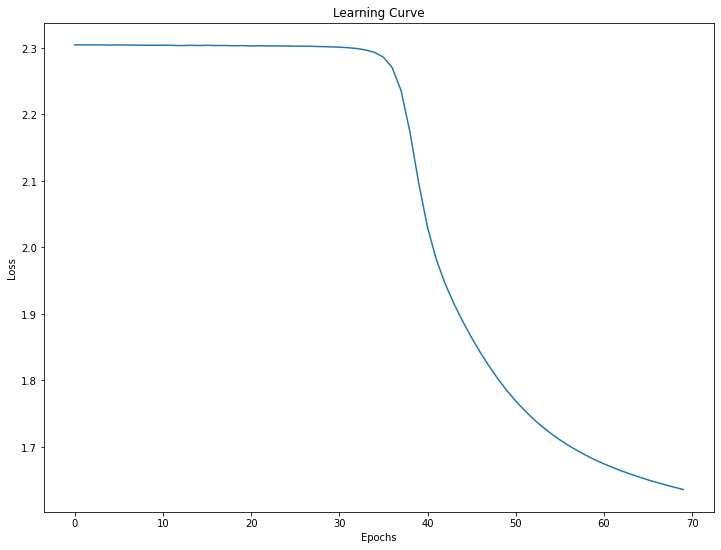

In [ ]:
w_kernel = tf.keras.initializers.Zeros()
model = tf.keras.models.Sequential([
    Dense(n_hidden[0], activation='sigmoid', input_shape=(Xnn_train_f.shape[1],), kernel_initializer=w_kernel),
    Dense(n_hidden[1], activation='sigmoid', kernel_initializer=w_kernel),
    Dense(ynn_train.shape[1], activation='softmax', kernel_initializer=w_kernel)
    ])

# compile model with stochastic gradient descent optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train model with batch size of 32 and 70 epochs
history_w = model.fit(Xnn_train_f, ynn_train, epochs=70, batch_size=32)

# evaluate model on test set
test_loss, test_acc = model.evaluate(Xnn_val_f, ynn_val)
print(f'Test error: {1 - test_acc}')

plt.figure(figsize=(12,9))
plt.plot(history_w.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CS760HW4/LF_zeros.pdf')

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/70
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4605 - accuracy: 0.5622
Epoch 2/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7251 - accuracy: 0.7690
Epoch 3/70
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5704 - accuracy: 0.8209
Epoch 4/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4918 - accuracy: 0.8467
Epoch 5/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4421 - accuracy: 0.8631
Epoch 6/70
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4066 - accuracy: 0.8744
Epoch 7/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8830
Epoch 8/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3578 - accuracy: 0.8906
Epoch 9/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.8959
Epoch 10/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.324

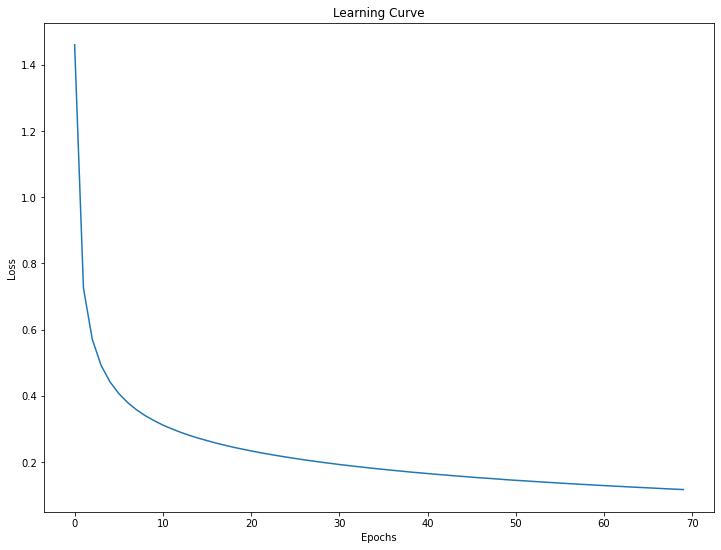

In [ ]:
w_kernel = tf.keras.initializers.RandomUniform(minval=-1,maxval=1)
model = tf.keras.models.Sequential([
    Dense(n_hidden[0], activation='sigmoid', input_shape=(Xnn_train_f.shape[1],), kernel_initializer=w_kernel),
    Dense(n_hidden[1], activation='sigmoid', kernel_initializer=w_kernel),
    Dense(ynn_train.shape[1], activation='softmax', kernel_initializer=w_kernel)
    ])

# compile model with stochastic gradient descent optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train model with batch size of 32 and 70 epochs
history_w = model.fit(Xnn_train_f, ynn_train, epochs=70, batch_size=32)

# evaluate model on test set
test_loss, test_acc = model.evaluate(Xnn_val_f, ynn_val)
print(f'Test error: {1 - test_acc}')

plt.figure(figsize=(12,9))
plt.plot(history_w.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CS760HW4/LF_randomunif.pdf')